# **Project: Customer Cohort Analysis**

### **Cohort Concept:**
- Group of people who share a common characteristic in a defined time period
- It is useful to track and compare behavior over time, especially retention

### **Data Used:**
- This project uses the "UCI Online Retail Dataset", which contains 1 year of transactions data from an online store
- Period: 2010 - 2011
- Contains ~500,000 rows of transaction data for a UK-based online retailer

---

## **P** **(Plan)**
### **Business Question?**
- What are the behavioral patterns of customers when analyzed through monthly cohorts?
### **Objectives**
- To evaluate customer behavior through monthly cohorts
- To identify trends in customer retention and engagement over time
- To support business decisions by understanding customer lifecycle patterns
---
## **A** (Analyze)


### **Steps:**
- Perform Data Wrangling:
    - Standarize columns
    - Convert Data format
    - Remove duplicates
    - Handle missing values
- Perform Exploratory Data Analysis (EDA):
    - Number of transactions per month
    - Distribuition of purchases per country
    - Average Revenue per customer
    - Python (Pandas) to make the data analysis - (~=500.000 rows) is ok to handle using pandas
- Tooling:
    - Python (Pandas, Numpy, Matplotlib)
    - With ~500k rows, is ok to use pandas
  
# **C** (Construct)
- Make new dataframes, calculation, tables using Python
---
# **E** (Execute
- Tableau to Data Visualization



The original file was in xlsx... Very slow.. I transformed to csv to have better performance

# Data Loading

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
pd.set_option('display.max_rows',60)
pd.get_option('display.max_rows')

60

In [4]:
%%time
##df0 = pd.read_excel('online_retail_II.xlsx')
##df0.to_parquet("online_retail.parquet")

CPU times: total: 0 ns
Wall time: 7.15 μs


In [3]:
df = pd.read_parquet("cohort_analysis/data/online_retail.parquet")
df.shape

(525461, 8)

## Data Wragling/Cleaning

In [4]:
### Quick Overviewd
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [6]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,525461,525461,522533,525461.000000,525461,525461.000000,417534.000000,525461
unique,28816,4632,4681,NaN,25296,NaN,NaN,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,675,3516,3549,NaN,675,NaN,NaN,485852
mean,NaN,NaN,NaN,10.337667,NaN,4.688834,15360.645478,NaN
std,NaN,NaN,NaN,107.424110,NaN,146.126914,1680.811316,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,-53594.360000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13983.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.100000,15311.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.210000,16799.000000,NaN


## Data Wrangling

In [7]:
# columns Names are not standarized - 1

# Invoice -  looks like int, but it is in string format
# StockCode - The format is Number and Number and letters form this field
# Description - There is some missing data less than 1%
# Quantity - Tehere is NEGATIVE quantities
# InvoiceDate is not in date format
# Price - should be Unit Price - There is NEGATIVE values
# Customer ID - There is a lot of missing values on , some in description
# Country - OK

In [8]:
print(df.columns)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [9]:
#standardizing column names
df = df.rename(columns ={
    'Invoice' : 'invoice',
    'StockCode' : 'stock_code',
    'Description' : 'description',
    'Quantity': 'quantity',
    'InvoiceDate': 'invoice_date',
    'Price': 'unit_price',
    'Customer ID': 'customer_id',
    'Country': 'country'
})

In [10]:
# Convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [11]:
df[df['customer_id'] == 0]

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


In [12]:
df[df['customer_id'].isnull()]

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,None,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,None,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,None,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,None,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [13]:
# df_clean[df_clean['quantity']<0]
df[df['quantity']<0]
df[df['unit_price']<0]

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [14]:
#To do the cohort analysis is necessary the customer_id, so, the na customer_id will be dropped
df_clean = df.dropna(subset=['customer_id']).copy()

In [15]:
#customer_id was string, now is possible to change to int
df_clean['customer_id'] = df_clean['customer_id'].astype(int)

In [16]:
#the quantity and price can't be negative to a purchase from a client
df_clean = df_clean[df_clean['quantity']>0]
df_clean = df_clean[df_clean['unit_price']>0]

In [17]:
df_clean['invoice'] = df_clean['invoice'].astype(int)

In [18]:
df_clean.dtypes

invoice                  int64
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

In [19]:
df_clean[df_clean.duplicated()]

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,2010-12-09 13:03:00,1.65,16065,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,2010-12-09 13:24:00,1.95,18041,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965,United Kingdom


In [20]:
## Depends on the business rule is possible to have duplicates, but I'm not sure about that and is not possible to contat the data provider, 
## duplicated rows will be dropped.

In [21]:
df_clean.drop_duplicates(inplace=True)

In [22]:
stock_codes_to_investigate = df_clean[df_clean['stock_code'].astype(str).str.match(r'^[A-Z*]')]['stock_code'].unique()
stock_codes_to_investigate 

array(['POST', 'C2', 'M', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS',
       'ADJUST', 'D', 'ADJUST2', 'SP1002'], dtype=object)

In [23]:
for stock_code in stock_codes_to_investigate:
    print(f"\nStock Code: {stock_code}")
    print(df_clean[df_clean['stock_code'] == stock_code][['stock_code', 'description']].head(1))


Stock Code: POST
   stock_code description
89       POST     POSTAGE

Stock Code: C2
     stock_code description
9292         C2    CARRIAGE

Stock Code: M
      stock_code description
11310          M      Manual

Stock Code: BANK CHARGES
         stock_code    description
18466  BANK CHARGES   Bank Charges

Stock Code: TEST001
      stock_code              description
27994    TEST001  This is a test product.

Stock Code: TEST002
      stock_code              description
39411    TEST002  This is a test product.

Stock Code: PADS
      stock_code                 description
62299       PADS  PADS TO MATCH ALL CUSHIONS

Stock Code: ADJUST
      stock_code                          description
70976     ADJUST  Adjustment by john on 26/01/2010 16

Stock Code: D
       stock_code description
160443          D    Discount

Stock Code: ADJUST2
       stock_code                          description
249672    ADJUST2  Adjustment by Peter on Jun 25 2010 

Stock Code: SP1002
       stock_code

In [24]:
#from the list stock_codes_to_investigate, just the code SP1002 is useful to analysis
stock_codes_to_exclude = (['POST', 'C2', 'M', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS', 'ADJUST', 'D', 'ADJUST2'])
df_clean = df_clean[~df_clean['stock_code'].isin(stock_codes_to_exclude)]

In [25]:
df_clean.shape

(399554, 8)

In [27]:
#the dataset has inconsistencies: diferent number of stock_code have multiple descriptions, ideally should have a unique description..
#  investigating: stock codes with more than one description

#cfiltering stock_code with more than  one description
multi_desc = df_clean.groupby('stock_code')['description'].nunique()
multi_desc = multi_desc[multi_desc > 1]

#Extracting rows with inconsistencies
inconsistent_descriptions = df_clean[df_clean['stock_code'].isin(multi_desc.index)]

desc_comparison = (
    inconsistent_descriptions
    .groupby(['stock_code', 'description'])
    .size()
    .reset_index()
)

desc_comparison.head()

,stock_code,description,0
0,15058B,PINK POLKADOT GARDEN PARASOL,3
1,15058B,PINK WHITE SPOTS GARDEN PARASOL,47
2,16011,ANIMAL STICKERS,12
3,16011,ANIMAL STICKERS,56
4,16012,FOOD/DRINK SPONGE STICKERS,28


In [28]:
# Now, to clean the data, I choose the most frequent description (mode) for each stock code,
# assuming that the most common name is the correct one. (practical solution for standardizing product names)

df_clean.loc[:, 'description'] = df_clean['stock_code'].map(df_clean.groupby('stock_code')['description'].agg(lambda x: x.mode().iat[0]))

In [29]:
df_clean['stock_code'].nunique()

4007

In [30]:
df_clean['description'].nunique()

3984

In [31]:
#verifying if there are any stock codes missing a description
missing_desc = df_clean[df_clean['description'].isna()]
missing_stock_codes = missing_desc['stock_code'].unique()
print(f"Number of stock_codes without description: {len(missing_stock_codes)}")
print(missing_stock_codes)

Number of stock_codes without description: 0
[]


In [32]:
#checking if different stock_codes share the same description

desc_codes = df_clean.groupby('description')['stock_code'].unique()
desc_codes = desc_codes[desc_codes.apply(len)>1]

print(desc_codes.head(5))

description
ACRYLIC JEWEL SNOWFLAKE,BLUE          [35817B, 35815B]
BLUE FLOCK GLASS CANDLEHOLDER           [79328, 79337]
COLOURING PENCILS BROWN TUBE     [10133, 10135, 10134]
COLUMBIAN CANDLE RECTANGLE              [72131, 72133]
COLUMBIAN CANDLE ROUND                  [72128, 72130]
Name: stock_code, dtype: object


## Featuring Engineering

In [33]:
df_valid = df_clean.copy()

In [34]:
#Creating new collumns to auxiliate in calculaitons
df_valid['invoice_year'] = df_valid['invoice_date'].dt.year
df_valid['invoice_month'] = df_valid['invoice_date'].dt.month
df_valid['invoice_year_month'] = df_valid['invoice_date'].dt.to_period('M').dt.to_timestamp()
df_valid['invoice_day'] = df_valid['invoice_date'].dt.day
df_valid['invoice_day_of_week'] = df_valid['invoice_date'].dt.weekday

In [35]:
%%time
df_valid['total'] = df['unit_price'] * df['quantity']

CPU times: total: 15.6 ms
Wall time: 20.2 ms


In [36]:
df_valid.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_year,invoice_month,invoice_year_month,invoice_day,invoice_day_of_week,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,2009-12-01,1,1,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,2009-12-01,1,1,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,2009-12-01,1,1,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009,12,2009-12-01,1,1,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009,12,2009-12-01,1,1,30.0


In [37]:
#Creating cohort 
df_valid['cohort_start_date'] = df_valid.groupby('customer_id')['invoice_year_month'].transform('min')

In [38]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399554 entries, 0 to 525460
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice              399554 non-null  int64         
 1   stock_code           399554 non-null  object        
 2   description          399554 non-null  object        
 3   quantity             399554 non-null  int64         
 4   invoice_date         399554 non-null  datetime64[ns]
 5   unit_price           399554 non-null  float64       
 6   customer_id          399554 non-null  int64         
 7   country              399554 non-null  object        
 8   invoice_year         399554 non-null  int32         
 9   invoice_month        399554 non-null  int32         
 10  invoice_year_month   399554 non-null  datetime64[ns]
 11  invoice_day          399554 non-null  int32         
 12  invoice_day_of_week  399554 non-null  int32         
 13  total              

In [39]:
#checking if the unit price chanbges
unit_price_counts = df_valid.groupby('stock_code')['unit_price'].nunique()
unit_price_counts[unit_price_counts > 1].sort_values(ascending=False).head()

stock_code
48188    8
20685    8
48138    8
48111    7
48116    7
Name: unit_price, dtype: int64

In [41]:
df_valid[(df_valid['stock_code'] == '20685') & (df_valid['quantity'] == 5)][['invoice','stock_code', 'quantity', 'unit_price', 'invoice_date', 'country']]

,invoice,stock_code,quantity,unit_price,invoice_date,country
109852,499962,20685,5,7.49,2010-03-03 13:04:00,United Kingdom
347078,523155,20685,5,7.95,2010-09-20 15:03:00,United Kingdom
359771,524266,20685,5,7.95,2010-09-28 11:43:00,United Kingdom
507986,536839,20685,5,7.95,2010-12-02 18:25:00,United Kingdom


In [42]:
# the price changes a lot over time and depending on quantity, so it's not feasible to create a new table with stock_code and price, 
# no clear logic was found

In [46]:
# making a copy do a new dataframe and make some exploration and analysis
df_cohort = df_valid.reset_index(drop=True).copy()

In [47]:
#creating cohort period feature

df_cohort['cohort_index'] = ((df_cohort['invoice_year_month'].dt.year - df_cohort['cohort_start_date'].dt.year) * 12
                              + (df_cohort['invoice_year_month'].dt.month - df_cohort['cohort_start_date'].dt.month) + 1)

In [44]:
#exporting df_cohort to analysis using TABLEAU
#It was necessary the csv format becaus tableau public doesn't support parquet format

df_cohort.to_csv('cohort_data.csv', index=False)

NameError: name 'df_cohort' is not defined

In [97]:
#files_size:
# -parquet: 3.230kb
# -csv: 52.120kb
# 16X difference in size

In [48]:
#december month is incomplete... Including it in the monthly analysis may lead to inaccurate results.
df_cohort_filtered = df_cohort[df_cohort['invoice_date']<='2010-11-30']

In [49]:
df_cohort_filtered.tail()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_year,invoice_month,invoice_year_month,invoice_day,invoice_day_of_week,total,cohort_start_date,cohort_index
383334,536042,22952,60 CAKE CASES VINTAGE CHRISTMAS,4,2010-11-29 17:35:00,0.55,13955,United Kingdom,2010,11,2010-11-01,29,0,2.20,2010-11-01,1
383335,536042,22607,WOODEN ROUNDERS GARDEN SET,1,2010-11-29 17:35:00,9.95,13955,United Kingdom,2010,11,2010-11-01,29,0,9.95,2010-11-01,1
383336,536042,21930,JUMBO STORAGE BAG SKULLS,1,2010-11-29 17:35:00,1.95,13955,United Kingdom,2010,11,2010-11-01,29,0,1.95,2010-11-01,1
383337,536042,21034,REX CASH+CARRY JUMBO SHOPPER,2,2010-11-29 17:35:00,0.95,13955,United Kingdom,2010,11,2010-11-01,29,0,1.90,2010-11-01,1
383338,536042,22628,PICNIC BOXES SET OF 3 RETROSPOT,1,2010-11-29 17:35:00,4.95,13955,United Kingdom,2010,11,2010-11-01,29,0,4.95,2010-11-01,1


### Cohort Analysis
#### A cohort analysis is an analysis of several different cohorts to get a better understanding of behaviors patterns and trends



In [50]:

cohort_counts = df_cohort_filtered.groupby(['cohort_start_date','cohort_index'])['customer_id'].nunique().reset_index()

In [51]:
cohort_pivot = cohort_counts.pivot(index='cohort_start_date', columns = 'cohort_index', values='customer_id')

In [52]:
cohort_pivot.head(20)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_start_date,,,,,,,,,,,,
2009-12-01,951.0,333.0,317.0,404.0,360.0,342.0,358.0,327.0,321.0,344.0,401.0,457.0
2010-01-01,368.0,79.0,118.0,116.0,100.0,114.0,99.0,86.0,105.0,120.0,111.0,NaN
2010-02-01,375.0,88.0,85.0,110.0,92.0,74.0,72.0,108.0,96.0,102.0,NaN,NaN
2010-03-01,441.0,84.0,102.0,107.0,102.0,90.0,109.0,135.0,119.0,NaN,NaN,NaN
2010-04-01,294.0,56.0,56.0,47.0,54.0,65.0,81.0,75.0,NaN,NaN,NaN,NaN
2010-05-01,255.0,40.0,43.0,45.0,45.0,65.0,53.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,267.0,47.0,50.0,55.0,62.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,185.0,29.0,34.0,55.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,163.0,32.0,47.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
cohort_pivot_perc = cohort_pivot.copy()
cohort_pivot_perc = (round(cohort_pivot_perc.div(cohort_pivot_perc[1], axis=0),3))
cohort_pivot_perc.index = cohort_pivot_perc.index.to_series().dt.strftime('%Y/%m')
cohort_pivot_perc.head()

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_start_date,,,,,,,,,,,,
2009/12,1.0,0.350,0.333,0.425,0.379,0.360,0.376,0.344,0.338,0.362,0.422,0.481
2010/01,1.0,0.215,0.321,0.315,0.272,0.310,0.269,0.234,0.285,0.326,0.302,NaN
2010/02,1.0,0.235,0.227,0.293,0.245,0.197,0.192,0.288,0.256,0.272,NaN,NaN
2010/03,1.0,0.190,0.231,0.243,0.231,0.204,0.247,0.306,0.270,NaN,NaN,NaN
2010/04,1.0,0.190,0.190,0.160,0.184,0.221,0.276,0.255,NaN,NaN,NaN,NaN


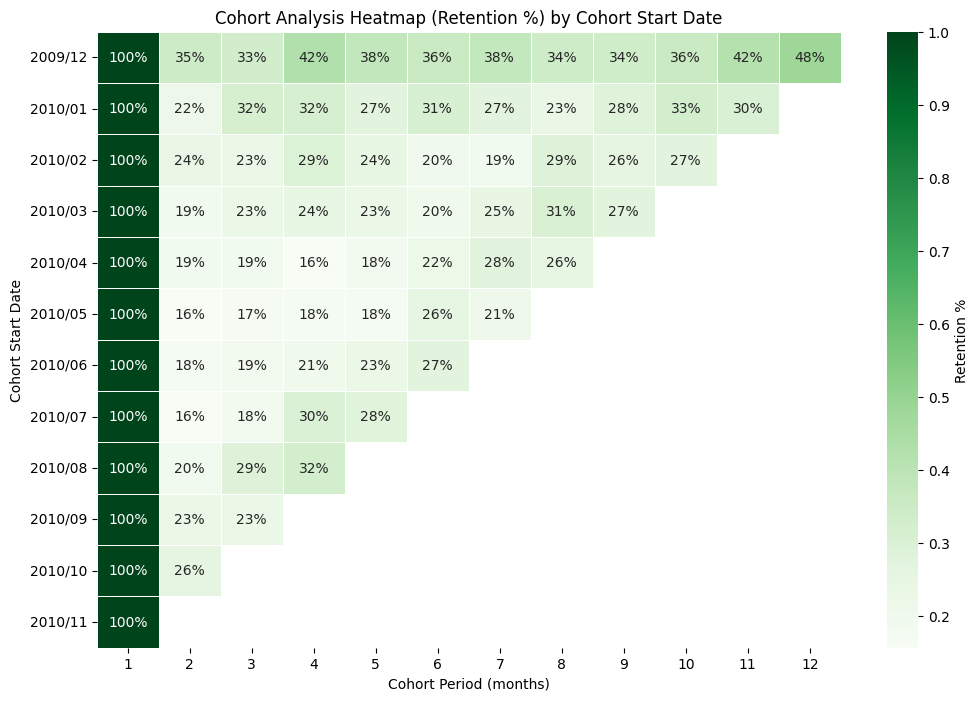

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot_perc, 
            annot=True,         # show the values on cells
            fmt=".0%",          # format numbers to 1 decimal place
            cmap="Greens",      # color palette
            linewidths=.5,      # lines between cells
            cbar_kws={'label': 'Retention %'})

plt.title('Cohort Analysis Heatmap (Retention %) by Cohort Start Date')
plt.ylabel('Cohort Start Date')
plt.xlabel('Cohort Period (months)')
plt.show()


In [62]:
cohort_pivot_perc['mean_cohort']  = cohort_pivot_perc.iloc[:,1:].mean(axis=1, skipna=True)

In [63]:
cohort_pivot_perc.head(15)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,mean_cohort
cohort_start_date,,,,,,,,,,,,,
2009/12,1.0,0.350,0.333,0.425,0.379,0.360,0.376,0.344,0.338,0.362,0.422,0.481,0.379091
2010/01,1.0,0.215,0.321,0.315,0.272,0.310,0.269,0.234,0.285,0.326,0.302,NaN,0.284900
2010/02,1.0,0.235,0.227,0.293,0.245,0.197,0.192,0.288,0.256,0.272,NaN,NaN,0.245000
2010/03,1.0,0.190,0.231,0.243,0.231,0.204,0.247,0.306,0.270,NaN,NaN,NaN,0.240250
2010/04,1.0,0.190,0.190,0.160,0.184,0.221,0.276,0.255,NaN,NaN,NaN,NaN,0.210857
2010/05,1.0,0.157,0.169,0.176,0.176,0.255,0.208,NaN,NaN,NaN,NaN,NaN,0.190167
2010/06,1.0,0.176,0.187,0.206,0.232,0.273,NaN,NaN,NaN,NaN,NaN,NaN,0.214800
2010/07,1.0,0.157,0.184,0.297,0.281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229750
2010/08,1.0,0.196,0.288,0.325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269667


### Total Sales by customer

In [ ]:
df_agg = (
    df_cohort
    .groupby(['customer_id', 'cohort_start_date', 'cohort_index', 'country', 'invoice_year', 'invoice_month', 'stock_code', 'description'], as_index=False)
    .agg(total_sales=('total', 'sum'))
)

df_agg['invoice_date'] = pd.to_datetime(df_agg['invoice_year'].astype(str) + '-' + df_agg['invoice_month'].astype(str) + '-01')
df_agg.drop(['invoice_year', 'invoice_month'], axis=1, inplace=True)


TypeError: 'Series' object is not callable

In [87]:
df_agg.dtypes

customer_id                   int64
cohort_start_date    datetime64[ns]
cohort_index                  int32
country                      object
stock_code                   object
description                  object
total_sales                 float64
invoice_date         datetime64[ns]
dtype: object

In [ ]:
#to have optimized performance... but in Tableau public is not possible to use
from tableauhyperapi import HyperProcess, Connection, TableDefinition, SqlType, Inserter, Telemetry, TableName, CreateMode
import pandas as pd

# Caminho de saída do arquivo .hyper
hyper_path = "cohort_analysis/data/monthly_customer_sales_by_cohort.hyper"

# Inicia o processo Hyper
with HyperProcess(telemetry=Telemetry.DO_NOT_SEND_USAGE_DATA_TO_TABLEAU) as hyper:
    with Connection(endpoint=hyper.endpoint, database=hyper_path, create_mode=CreateMode.CREATE_AND_REPLACE) as connection:
        
        # Define a tabela e seus tipos de dados
        table = TableDefinition(
            table_name=TableName("Extract"),
            columns=[
                TableDefinition.Column("customer_id", SqlType.int()),
                TableDefinition.Column("cohort_start_date", SqlType.date()),
                TableDefinition.Column("cohort_index", SqlType.int()),
                TableDefinition.Column("country", SqlType.text()),
                TableDefinition.Column("stock_code", SqlType.text()),
                TableDefinition.Column("description", SqlType.text()),
                TableDefinition.Column("total_sales", SqlType.double()),
                TableDefinition.Column("invoice_date", SqlType.date())
            ]
        )
        
        # Cria a tabela no arquivo .hyper
        connection.catalog.create_table(table)
        
        # Insere os dados do DataFrame
        with Inserter(connection, table) as inserter:
            inserter.add_rows(rows=df_agg.itertuples(index=False, name=None))
            inserter.execute()

In [79]:
df_agg.head()
df_agg.to_csv('cohort_analysis/data/monthly_aggregated_sales_data.csv', index=False)

In [89]:
cohort_customer_total = df_cohort.groupby('customer_id', as_index=False)['total'].sum()
total_sales = df_cohort['total'].sum()
cohort_customer_total['perc_cust_total'] = ((cohort_customer_total['total']/total_sales)*100).round(2)
cohort_customer_total

,customer_id,total,perc_cust_total
0,12346,169.36,0.00
1,12347,1323.32,0.02
2,12348,221.16,0.00
3,12349,2221.14,0.03
4,12351,300.93,0.00
...,...,...,...
4280,18283,619.37,0.01
4281,18284,411.68,0.00
4282,18285,377.00,0.00
4283,18286,1246.43,0.01


In [90]:
# Sort by  total descending
cohort_customer_total = cohort_customer_total.sort_values(by='total', ascending=False).reset_index(drop=True)

In [91]:
# caculate cumulative sum
cohort_customer_total['cumulative_sales'] = cohort_customer_total['total'].cumsum()
cohort_customer_total['cumulative_sales_perc'] = cohort_customer_total['perc_cust_total'].cumsum()

num_customers_80 = (cohort_customer_total['cumulative_sales_perc']<=80).sum()
print(f"Number of customers responsible for 80% of total sales: {num_customers_80}")

Number of customers responsible for 80% of total sales: 1174


In [92]:
cohort_customer_total.head(10)

,customer_id,total,perc_cust_total,cumulative_sales,cumulative_sales_perc
0,18102,349164.35,4.04,349164.35,4.04
1,14646,247613.50,2.87,596777.85,6.91
2,14156,186832.00,2.16,783609.85,9.07
3,14911,140352.54,1.62,923962.39,10.69
4,13694,131443.19,1.52,1055405.58,12.21
5,17511,84541.17,0.98,1139946.75,13.19
6,15061,83282.93,0.96,1223229.68,14.15
7,16684,80489.21,0.93,1303718.89,15.08
8,16754,65500.07,0.76,1369218.96,15.84
9,13089,57885.45,0.67,1427104.41,16.51


## Total Sales by country

In [199]:
cohort_country_total = df_cohort.groupby('country', as_index=False)['total'].sum()
cohort_country_total['market_share%'] = (cohort_country_total['total']/cohort_country_total['total'].sum()*100).round(2)

cohort_country_total.sort_values(by='total', ascending = False).reset_index(drop=True).head(10)

,country,total,market_share%
0,United Kingdom,7323098.34,84.76
1,EIRE,334196.74,3.87
2,Netherlands,266061.67,3.08
3,Germany,182889.93,2.12
4,France,131261.64,1.52
5,Denmark,50348.85,0.58
6,Sweden,49216.31,0.57
7,Spain,42854.91,0.50
8,Switzerland,41182.39,0.48
9,Australia,30313.35,0.35


Total Sales by month

In [93]:
df_cohort.tail()
#the month 12/2010, the last transaction present in the dataset is from day 09.. so this month is incomplete and to trend analysis by month, 12/2010 will be excluded


,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_year,invoice_month,invoice_year_month,invoice_day,invoice_day_of_week,total,cohort_start_date,cohort_index
399549,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,2010,12,2010-12-01,9,3,5.90,2009-12-01,13
399550,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,2010,12,2010-12-01,9,3,3.75,2009-12-01,13
399551,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,2010,12,2010-12-01,9,3,3.75,2009-12-01,13
399552,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,2010,12,2010-12-01,9,3,7.50,2009-12-01,13
399553,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530,United Kingdom,2010,12,2010-12-01,9,3,3.90,2009-12-01,13


In [226]:
# last_months = revenue.groupby('cohort_start_date')['cohort_period'].max().reset_index()

In [ ]:
df_cohort_filtered = df_cohort[df_cohort['invoice_year_month'] != '2010-12-01']

revenue = df_cohort_filtered.groupby(['cohort_start_date', 'cohort_index'])['total'].sum().reset_index().copy()

cohort_sizes = df_cohort.groupby('cohort_start_date')['customer_id'].nunique()
revenue['cohort_size'] = revenue['cohort_start_date'].map(cohort_sizes)
revenue['avg_ltv'] = revenue['total'] / revenue['cohort_size']
revenue['ltv_cumulative'] = revenue.groupby('cohort_start_date')['avg_ltv'].cumsum()
revenue['cohort_start_date'] = revenue['cohort_start_date'].dt.strftime('%Y-%m')

sales_by_month = df_cohort.groupby(['invoice_year','invoice_month'], as_index=False)['total'].sum()
customers_by_month = df_cohort.groupby(['invoice_year','invoice_month'], as_index=False)['customer_id'].nunique()
sales_by_customer = df_cohort.groupby(['invoice', 'customer_id'],as_index=False)['total'].sum()

In [114]:
customers_by_month
revenue.head(5)

,cohort_start_date,cohort_index,total,cohort_size,avg_ltv,ltv_cumulative
0,2009-12,1,677916.07,951,712.845499,712.845499
1,2009-12,2,375833.58,951,395.198297,1108.043796
2,2009-12,3,292734.75,951,307.817823,1415.861619
3,2009-12,4,375511.15,951,394.859253,1810.720873
4,2009-12,5,303329.99,951,318.958980,2129.679853


In [115]:
def get_slope(group):
    x = group['cohort_index']
    y = group['ltv_cumulative']

    if len(group) < 2 or x.nunique() == 1 or y.nunique() == 1:
        return pd.Series({'slope': np.nan})
    slope, intercept, r_value, p_value, std_err = linregress(group['cohort_index'], group['ltv_cumulative'])
    return pd.Series({'slope': slope})

slopes = revenue.groupby('cohort_start_date').apply(get_slope).reset_index()

print(slopes)

   cohort_start_date       slope
0            2009-12  363.056885
1            2010-01  151.639560
2            2010-02  119.946034
3            2010-03  135.117897
4            2010-04   89.140747
5            2010-05   69.894570
6            2010-06  105.315134
7            2010-07   96.354293
8            2010-08  102.239141
9            2010-09  105.264845
10           2010-10   73.877973
11           2010-11   36.616258
12           2010-12         NaN


C:\Users\vinic\AppData\Local\Temp\ipykernel_19248\3326708570.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes = revenue.groupby('cohort_start_date').apply(get_slope).reset_index()


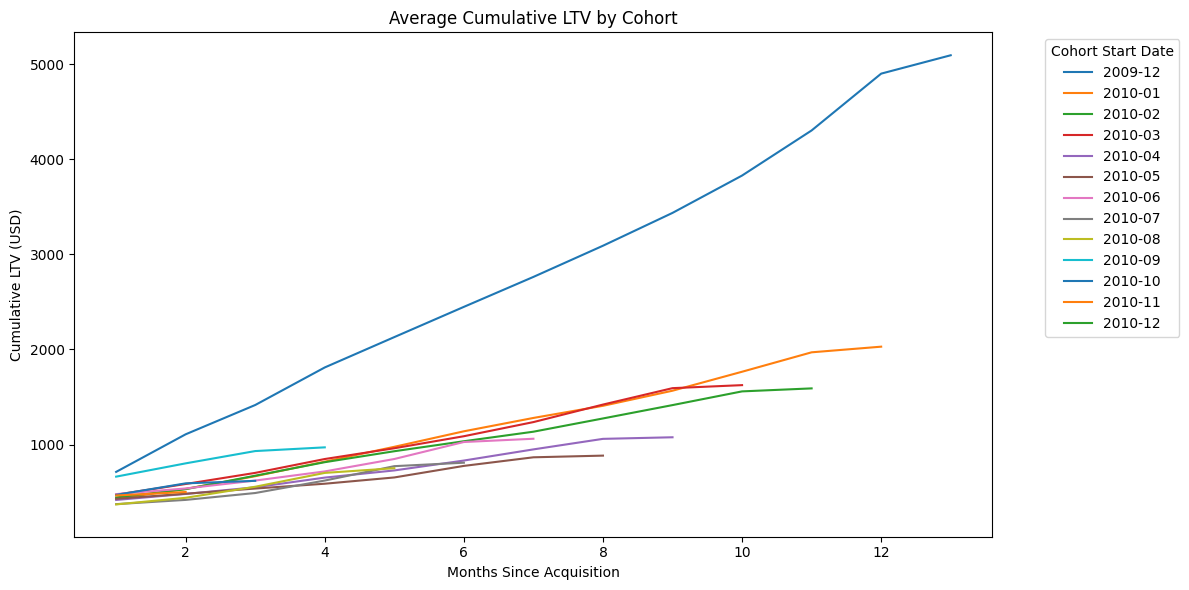

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue, x='cohort_index', y='ltv_cumulative', hue='cohort_start_date', palette='tab10')
plt.title('Average Cumulative LTV by Cohort')
plt.xlabel('Months Since Acquisition')
plt.ylabel('Cumulative LTV (USD)')
plt.legend(title='Cohort Start Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Products with more sales by monthly

In [102]:
cohort_product_sales = df_cohort_filtered.groupby(['invoice_year', 'invoice_month', 'stock_code', 'description'], as_index=False)['total'].sum()

In [103]:
max_rows = cohort_product_sales.loc[
    cohort_product_sales.groupby(['invoice_year', 'invoice_month'])['total'].idxmax()
]

max_rows = max_rows.sort_values(by=['invoice_year', 'invoice_month'])

max_rows.head(12)

,invoice_year,invoice_month,stock_code,description,total
2395,2009,12,85123A,WHITE HANGING HEART T-LIGHT HOLDER,16425.51
4865,2010,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14280.40
7209,2010,2,85123A,WHITE HANGING HEART T-LIGHT HOLDER,7629.90
9825,2010,3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12611.72
11337,2010,4,22423,REGENCY CAKESTAND 3 TIER,12891.90
14616,2010,5,85123A,WHITE HANGING HEART T-LIGHT HOLDER,11722.25
16042,2010,6,22423,REGENCY CAKESTAND 3 TIER,14949.75
18552,2010,7,22423,REGENCY CAKESTAND 3 TIER,16648.20
21946,2010,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12102.85
23399,2010,9,22423,REGENCY CAKESTAND 3 TIER,22460.10


In [109]:
ltv_df = df_cohort_filtered.groupby('customer_id', as_index=False)['total'].sum()
ltv_df.rename(columns={'total': 'ltv'}, inplace=True)

In [116]:
ltv_cohort = df_cohort_filtered.groupby(['cohort_index', 'customer_id'], as_index=False)['total'].sum()

ltv_avg_per_cohort = ltv_cohort.groupby('cohort_index')['total'].mean().reset_index()
ltv_avg_per_cohort.rename(columns={'total': 'avg_ltv'}, inplace=True)

ltv_avg_per_cohort

,cohort_index,avg_ltv
0,1,516.124234
1,2,684.149181
2,3,623.687280
3,4,671.085786
4,5,639.436272
5,6,685.868717
6,7,661.956598
7,8,714.566594
8,9,800.351040
9,10,881.568556


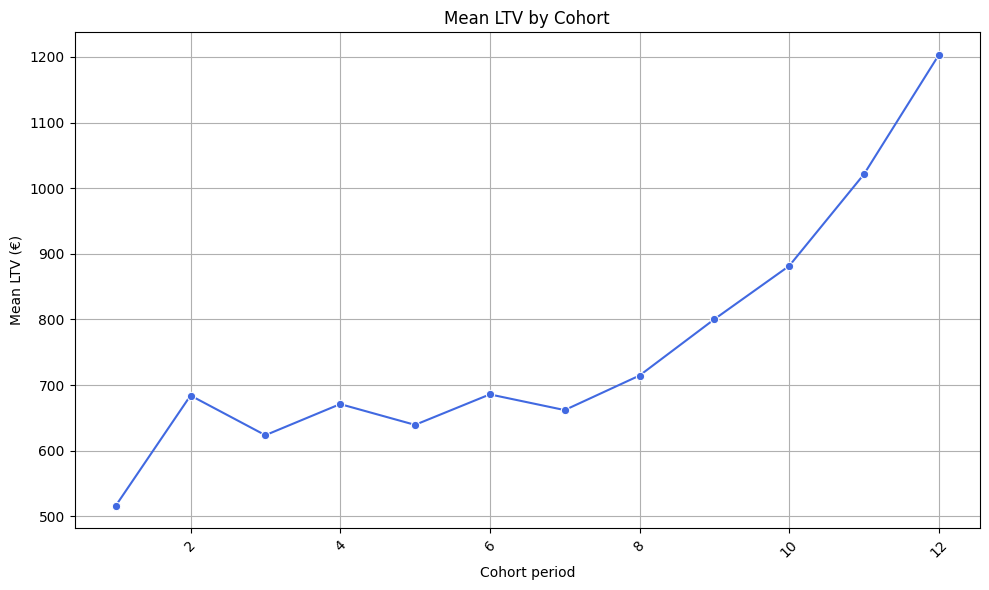

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(data=ltv_avg_per_cohort, x='cohort_index', y='avg_ltv', marker='o', color='royalblue')

plt.title('Mean LTV by Cohort')
plt.xlabel('Cohort period')
plt.ylabel('Mean LTV (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights: Strong Acceleration After Month 6 
From cohort_index = 6 onward, the LTV rises consistently:
- 685 → 714 → 800 → 881 → 1021 → 1203
- That’s ~75% increase from month 6 to month 12.
- Implication: Customers who stay past 6 months tend to become very valuable. There may be a "loyalty inflection point" — worth exploring retention strategies up to that month.

In [124]:
# Customer sales by country
ltv_by_customer = df_cohort.groupby(['customer_id', 'country'])['total'].sum().reset_index()

# AVG LTV by country
ltv_avg_country = ltv_by_customer.groupby('country')['total'].mean().sort_values(ascending=False).reset_index()

print(round(ltv_avg_country,2))

                 country      total
0                   EIRE  111398.91
1            Netherlands   12093.71
2                Denmark    5594.32
3              Lithuania    4892.68
4              Singapore    4037.77
5                 Greece    3571.42
6                 Sweden    3076.02
7               Thailand    3070.54
8            Switzerland    2941.60
9                 France    2916.93
10               Germany    2729.70
11                 Malta    2686.75
12                Norway    2476.96
13       Channel Islands    2213.30
14             Australia    2020.89
15                 Spain    1947.95
16        United Kingdom    1852.55
17  United Arab Emirates    1758.10
18                Poland    1743.90
19                 Japan    1620.34
20                Cyprus    1616.73
21                Israel    1599.70
22           Unspecified    1486.64
23               Iceland    1323.32
24               Belgium    1273.50
25              Portugal    1257.54
26                 Italy    

In [127]:
df_cohort[df_cohort['country']=='EIRE'].groupby('customer_id')['total'].sum()

customer_id
14016      7012.20
14156    186832.00
14911    140352.54
Name: total, dtype: float64